사용한 데이터 셋
https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

## 용어정리
- CLIENTNUM: 각 고객을 고유하게 식별하는 정수형 식별자입니다.
- **`Attrition_Flag`**: 이진형 변수로, 고객이 이탈했는지 여부를 나타냅니다. 이탈했다면 True (1), 이탈하지 않았다면 False (0)입니다.
- Customer_Age: 고객의 나이를 나타내는 정수형 변수입니다.
- Gender: 고객의 성별을 나타내는 문자열 변수입니다.
- Dependent_count: 고객이 부양하는 가족의 수를 나타내는 정수형 변수입니다.
- Education_Level: 고객의 교육 수준을 나타내는 문자열 변수입니다.
- Marital_Status: 고객의 결혼 여부를 나타내는 문자열 변수입니다.
- Income_Category: 고객의 소득 카테고리를 나타내는 문자열 변수입니다.
- Card_Category: 고객이 소지한 신용카드의 종류를 나타내는 문자열 변수입니다.
- Months_on_book: 고객이 신용카드를 사용한 기간을 나타내는 정수형 변수입니다.
- Total_Relationship_Count: 고객이 신용카드 제공자와 가지고 있는 총 관계의 수를 나타내는 정수형 변수입니다.
- Months_Inactive_12_mon: 지난 12개월 동안 고객이 비활성 상태였던 달의 수를 나타내는 정수형 변수입니다.
- Contacts_Count_12_mon: 지난 12개월 동안 고객이 가지고 있던 연락 횟수를 나타내는 정수형 변수입니다.
- Credit_Limit: 고객의 신용한도를 나타내는 정수형 변수입니다.
- Total_Revolving_Bal: 고객의 회전잔액 총액을 나타내는 정수형 변수입니다.
- Avg_Open_To_Buy: 평균 여유 신용한도를 나타내는 정수형 변수입니다.
- Total_Amt_Chng_Q4_Q1: 4분기에서 1분기로의 총 금액 변동을 나타내는 정수형 변수입니다.
- Total_Trans_Amt: 총 거래 금액을 나타내는 정수형 변수입니다.
- Total_Trans_Ct: 총 거래 횟수를 나타내는 정수형 변수입니다.
- Total_Ct_Chng_Q4_Q1: 4분기에서 1분기로의 총 거래 횟수 변동을 나타내는 정수형 변수입니다.
- Avg_Utilization_Ratio: 평균 이용률 비율을 나타내는 정수형 변수입니다.
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 다음과 같은 특성을 기반으로 누군가 이탈할지 여부를 예측하기 위한 Naive Bayes 분류기

# 데이터셋

In [2]:
df = pd.read_csv("D:/2차프로젝트/BankChurners.csv")

## Naive_Bayes 컬럼은 삭제 - 예측한 결과는 필요가 없다
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

## Attrited Customer = 1, Existing Customer = 0 으로 수정
# df.replace({"Attrited Customer":1, "Existing Customer":0}, inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
## 중복 고객 데이터 확인
print(df.duplicated().sum())
print(len(df.CLIENTNUM.unique()))

0
10127


In [4]:
## 결측치 확인
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
## object 데이터 값 확인 - 분석하기 어려운 값은 없다. ('-', 해석하기 어렵거나 전처리가 필요한 형태가 없다.)
print(df.Attrition_Flag.unique())
print(df.Gender.unique())
print(df.Education_Level.unique())
print(df.Marital_Status.unique())
print(df.Income_Category.unique())
print(df.Card_Category.unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## 나이대별 구간 나누기

In [8]:
## 나이 확인
np.sort(df['Customer_Age'].unique())

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73], dtype=int64)

In [9]:
## 나이별 구간 컬럼 생성
def group_age(x):
    if x < 30:
        return '20대'
    elif 30 <= x < 40:
        return '30대'
    elif 40 <= x < 50:
        return '40대'
    elif 50 <= x < 60:
        return '50대'
    elif 60 <= x < 70:
        return '60대'
    else:
        return '70대'

df['age_group'] = df['Customer_Age'].apply(group_age) 
df[['Customer_Age', 'age_group']]

,Customer_Age,age_group
0,45,40대
1,49,40대
2,51,50대
3,40,40대
4,40,40대
...,...,...
10122,50,50대
10123,41,40대
10124,44,40대
10125,30,30대


# 파생변수
- 이상치 제거 전 후도 비교가 필요

In [11]:
## 고객의 신용 한도('Credit_Limit') 대비 고객의 나이('Customer_Age') 
## 고객의 나이에 대비해 얼마나 큰 신용 한도를 부여받았는지를 나타내며, 이를 통해 신용카드 회사의 신용 한도 설정 정책을 분석할 수 있다.
## 나이가 많을수록 신용한도가 줄어드는지 줄어든다면 소득, 카드 종류, 카드 제공자와의 관계를 확인할 수 있다.
df['Credit_to_Age_Ratio'] = df['Credit_Limit'] / df['Customer_Age']
df[['Credit_to_Age_Ratio','Customer_Age']]

,Credit_to_Age_Ratio,Customer_Age
0,282.022222,45
1,168.489796,49
2,67.019608,51
3,82.825000,40
4,117.900000,40
...,...,...
10122,80.060000,50
10123,104.317073,41
10124,122.931818,44
10125,176.033333,30


In [19]:
## 고객이 신용카드를 사용한 기간(달) ('Months_on_book') 대비 총 거래 횟수('Total_Trans_Ct')
## 고객이 신용카드를 얼마나 자주 사용하는지를 나타내며, 이를 통해 고객의 신용카드 활용도를 파악할 수 있습니다.
## 한 달 동안 거래 횟수
df['Transaction_Per_Month'] = df['Total_Trans_Ct'] / df['Months_on_book']
df['Transaction_Per_Month']

0        1.076923
1        0.750000
2        0.555556
3        0.588235
4        1.333333
           ...   
10122    2.925000
10123    2.760000
10124    1.666667
10125    1.722222
10126    2.440000
Name: Transaction_Per_Month, Length: 10127, dtype: float64

In [22]:
# 고객이 신용카드를 사용한 기간('Months_on_book') 대비 비활성 상태였던 기간('Months_Inactive_12_mon')의 비율을 나타내는 변수
# 고객이 신용카드를 가진 기간 동안 얼마나 많은 시간을 비활성 상태로 보냈는지를 나타내는 지표가 될 수 있습니다. 
# 만약 이 비율이 높다면, 고객이 이탈할 가능성이 더 높아질 수 있습니다.
df['Inactive_Ratio'] = df['Months_Inactive_12_mon'] / df['Months_on_book']
np.sort(df['Inactive_Ratio'].unique())

array([0.        , 0.01785714, 0.01818182, 0.01851852, 0.01886792,
       0.01923077, 0.01960784, 0.02      , 0.02040816, 0.02083333,
       0.0212766 , 0.02173913, 0.02222222, 0.02272727, 0.02325581,
       0.02380952, 0.02439024, 0.025     , 0.02564103, 0.02631579,
       0.02702703, 0.02777778, 0.02857143, 0.02941176, 0.03030303,
       0.03125   , 0.03225806, 0.03333333, 0.03448276, 0.03571429,
       0.03636364, 0.03703704, 0.03773585, 0.03846154, 0.03921569,
       0.04      , 0.04081633, 0.04166667, 0.04255319, 0.04347826,
       0.04444444, 0.04545455, 0.04651163, 0.04761905, 0.04878049,
       0.05      , 0.05128205, 0.05263158, 0.05357143, 0.05405405,
       0.05454545, 0.05555556, 0.05660377, 0.05714286, 0.05769231,
       0.05882353, 0.06      , 0.06060606, 0.06122449, 0.0625    ,
       0.06382979, 0.06451613, 0.06521739, 0.06666667, 0.06818182,
       0.06896552, 0.06976744, 0.07142857, 0.07317073, 0.07407407,
       0.075     , 0.0754717 , 0.07692308, 0.07843137, 0.07894

In [24]:
# 고객의 신용 한도('Credit_Limit') 대비 회전 잔액('Total_Revolving_Bal')의 비율 변화를 나타내는 변수
# 고객이 신용 한도 중 얼마나 많은 비율을 사용하고 있는지를 나타냅니다. 
# 신용 한도를 많이 사용하는 고객은 이탈할 가능성이 더 높을 수 있습니다.
df['Utilization_Ratio'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
np.sort(df['Utilization_Ratio'].unique())

array([0.        , 0.0044617 , 0.00541959, ..., 0.99393204, 0.99463231,
       0.99876797])

In [28]:
## 고객이 신용카드를 가진 기간 동안 얼마나 자주 연락을 받았는지를 나타냅니다. 
## 연락 빈도가 너무 높으면 고객의 만족도를 떨어뜨릴 수 있고, 이탈을 유발할 수 있습니다.
df['Contact_Frequency'] = df['Contacts_Count_12_mon'] / df['Months_on_book']
df['Contact_Frequency']

0        0.076923
1        0.045455
2        0.000000
3        0.029412
4        0.000000
           ...   
10122    0.075000
10123    0.120000
10124    0.111111
10125    0.083333
10126    0.160000
Name: Contact_Frequency, Length: 10127, dtype: float64

In [29]:
# 고객이 신용카드 제공자와 가지고 있는 총 관계의 수('Total_Relationship_Count') 대비 총 거래 횟수('Total_Trans_Ct')의 비율을 나타내는 변수입니다. 
# 이 변수를 통해 회사가 고객과의 관계를 얼마나 잘 유지하고 있는지 측정할 수 있습니다. 
# 이 비율이 높을수록 고객과의 관계가 좋고, 고객이 이탈할 확률이 낮아질 수 있습니다.
df['Avg_Transaction_Per_Relationship'] = df['Total_Trans_Ct'] / df['Total_Relationship_Count']
df['Avg_Transaction_Per_Relationship']

0         8.400000
1         5.500000
2         5.000000
3         6.666667
4         5.600000
           ...    
10122    39.000000
10123    17.250000
10124    12.000000
10125    15.500000
10126    10.166667
Name: Avg_Transaction_Per_Relationship, Length: 10127, dtype: float64

## 파생변수 시각화

In [30]:
# Data visualization
### 타입이 연속형
def plot_histogram(df, column, bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue="Attrition_Flag", bins=bins, kde=True, palette='coolwarm', element='step') # 'bars', 'step', 'poly' 
    plt.title(f'Histogram of {column}', size=15)
    plt.xlabel(column, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

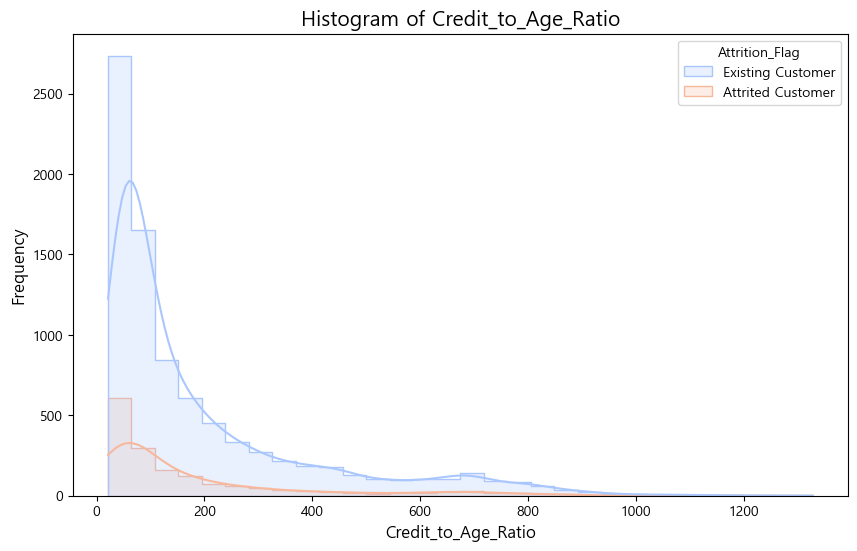

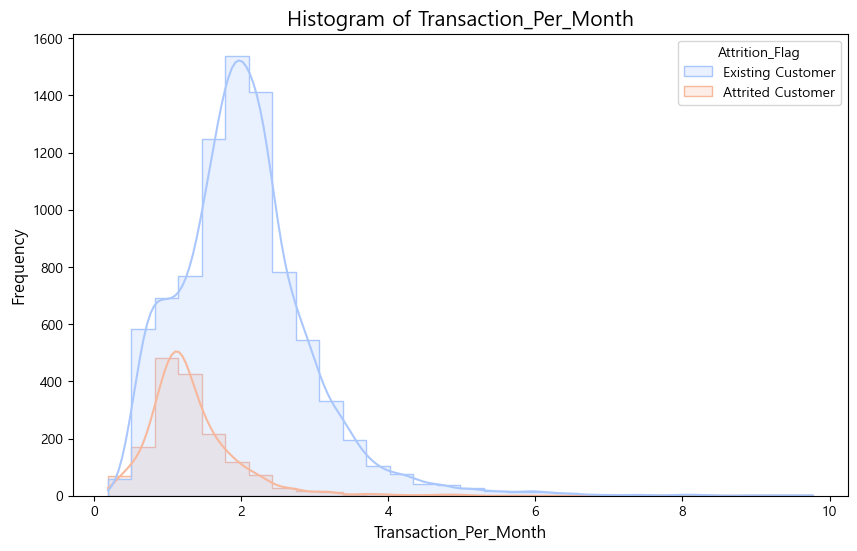

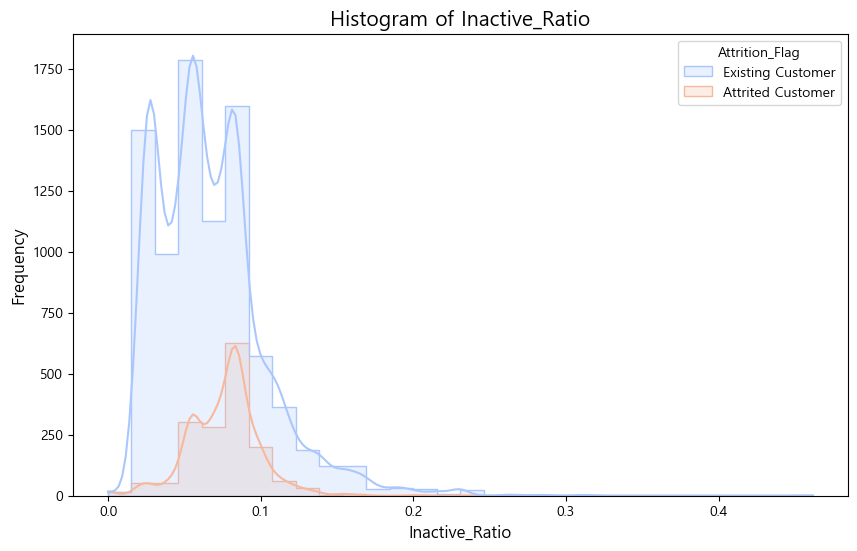

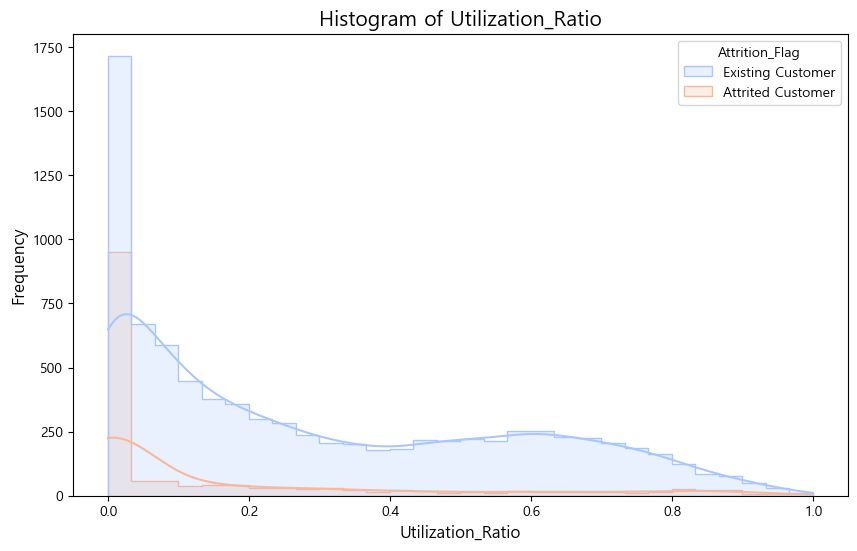

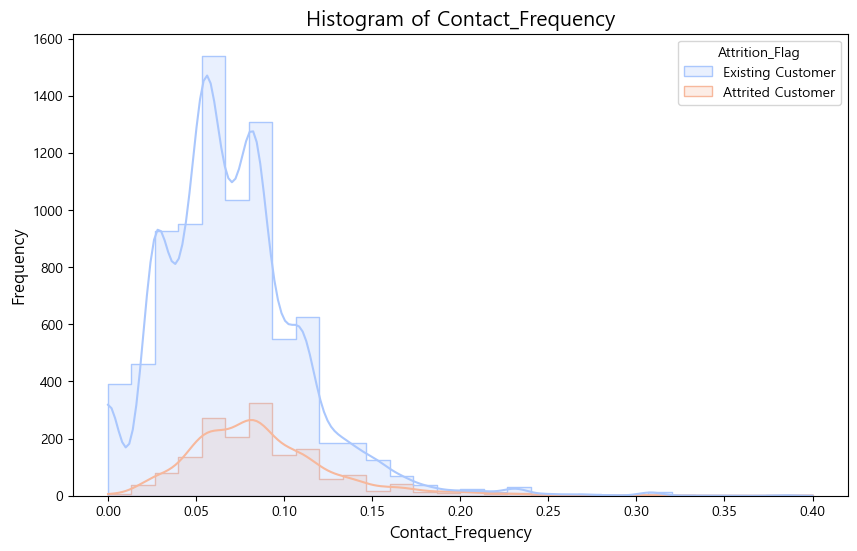

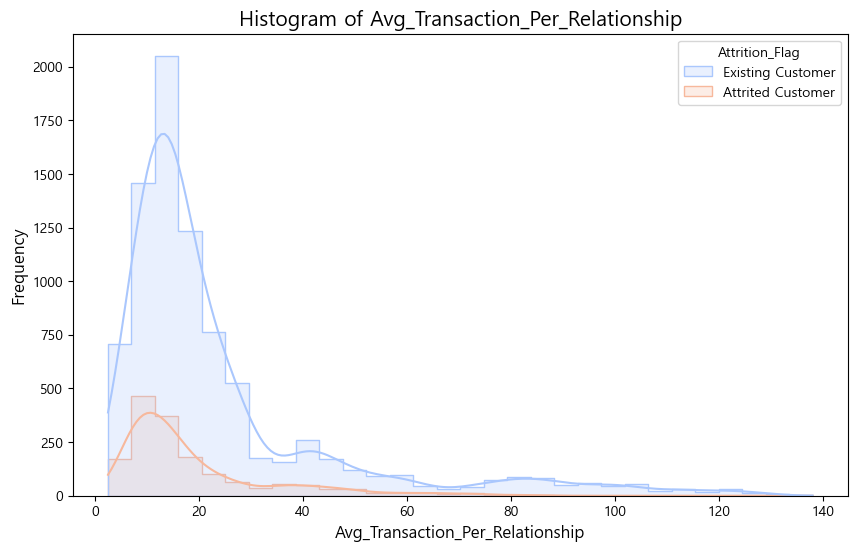

In [31]:
cols = ['Credit_to_Age_Ratio', 'Transaction_Per_Month', 'Inactive_Ratio', 'Utilization_Ratio', 'Contact_Frequency', 'Avg_Transaction_Per_Relationship']
for col in cols:
    plot_histogram(df, col)

# 이탈 그룹 vs 비이탈 그룹

In [33]:
## 두 그룹의 데이터 추출
attrited = df[df['Attrition_Flag'] == "Attrited Customer"]
existing = df[df['Attrition_Flag'] == "Existing Customer"]

## 인덱스 초기화
attrited.reset_index(drop=True, inplace=True)
existing.reset_index(drop=True, inplace=True)

In [34]:
attrited_count = len(df[df['Attrition_Flag'] == "Attrited Customer"])
existing_count = len(df[df['Attrition_Flag'] == "Existing Customer"])

print("Attrited customer count:", attrited_count)
print("Existing customer count:", existing_count)

Attrited customer count: 1627
Existing customer count: 8500


In [35]:
# 'Existing Customer' 그룹에서 'Attrited Customer' 그룹의 샘플 수만큼 샘플링
existing_downsampled = df[df['Attrition_Flag'] == "Existing Customer"].sample(attrited_count)

# 다운 샘플링된 'Existing Customer' 그룹과 'Attrited Customer' 그룹을 합침
df_downsampled = pd.concat([existing_downsampled, df[df['Attrition_Flag'] == "Attrited Customer"]])

# 결과 확인
print(df_downsampled['Attrition_Flag'].value_counts())

Attrition_Flag
Existing Customer    1627
Attrited Customer    1627
Name: count, dtype: int64


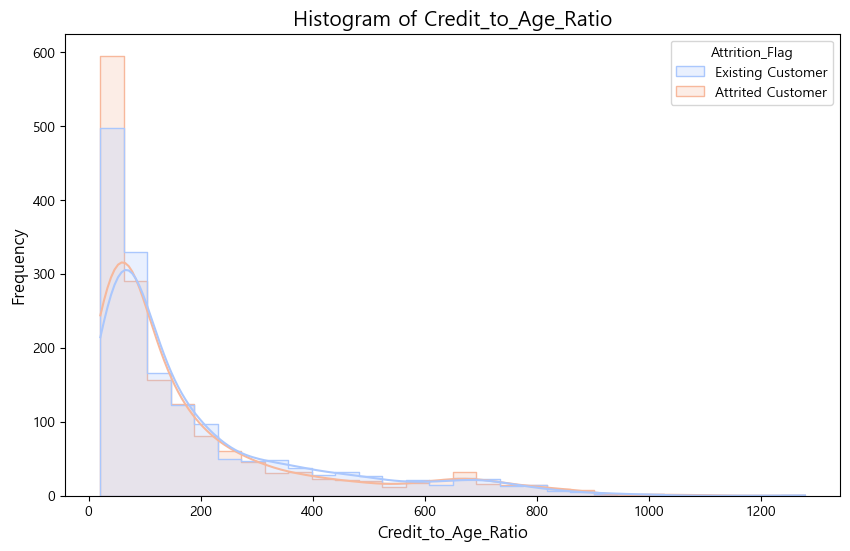

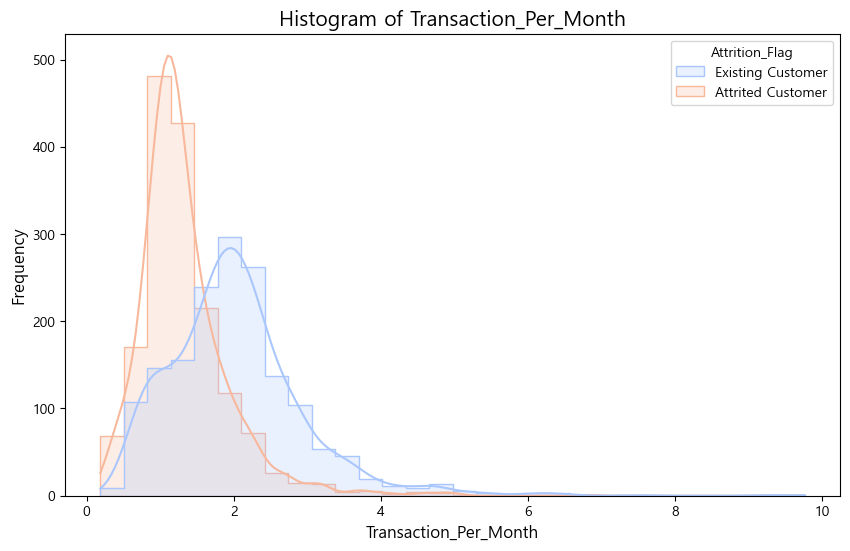

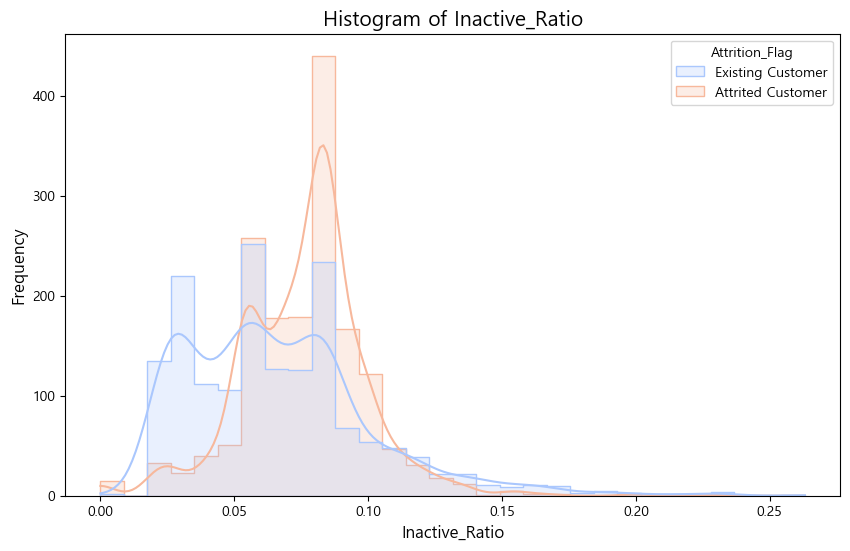

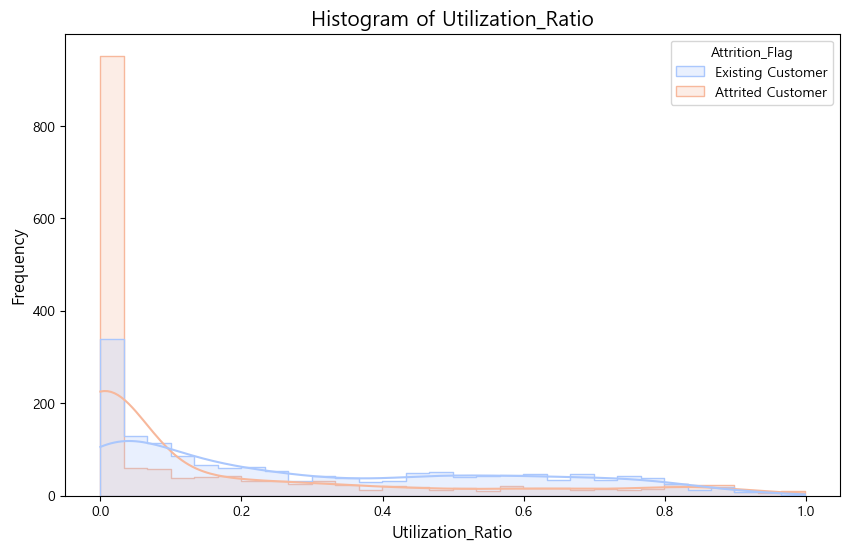

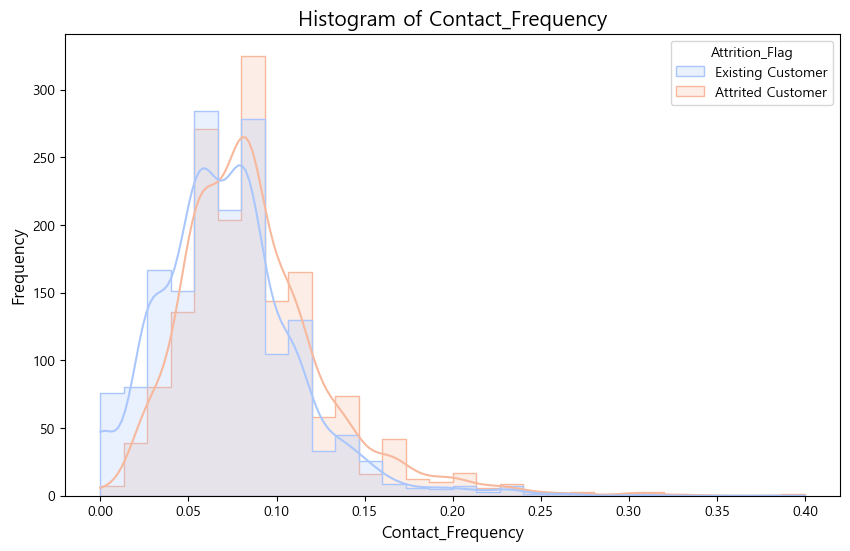

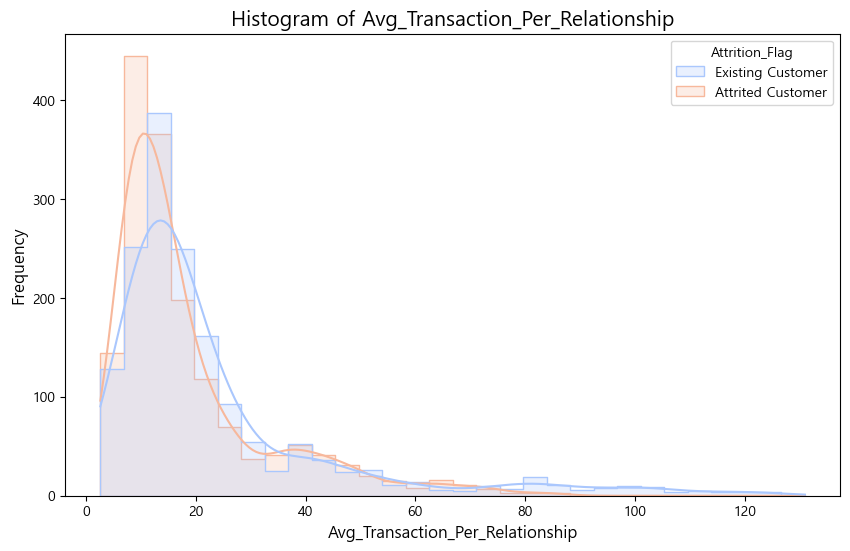

In [36]:
cols = ['Credit_to_Age_Ratio', 'Transaction_Per_Month', 'Inactive_Ratio', 'Utilization_Ratio', 'Contact_Frequency', 'Avg_Transaction_Per_Relationship']
for col in cols:
    plot_histogram(df_downsampled, col)